# Lab 6.02 - Regression analysis

In [2]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz
from sklearn.linear_model import LinearRegression

## Exercise 2: Flemish agricultural and horticultural businesses

1. Use the dataset agriculture flanders.csv. The file contains data about agricultural and horticultural businesses in Flanders

    Source: Departement Landbouw en Visserij op basis van StatBel

In [3]:
farms = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/agriculture%20flanders.csv', delimiter = ";", decimal=',')
# Show the first few records of the Data Frame
farms.head()

,year,number_of_farms,average_area_per_farm_(ha)
0,1980,75706,8.38
1,1981,73292,8.58
2,1982,71255,8.79
3,1983,69807,8.94
4,1984,68083,9.15


2. What are the datatypes for each of the columns.

In [4]:
farms.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        41 non-null     int64  
 1   number_of_farms             41 non-null     int64  
 2   average_area_per_farm_(ha)  41 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.1 KB


3. Draw a scatter plot of the number of farms versus the year.


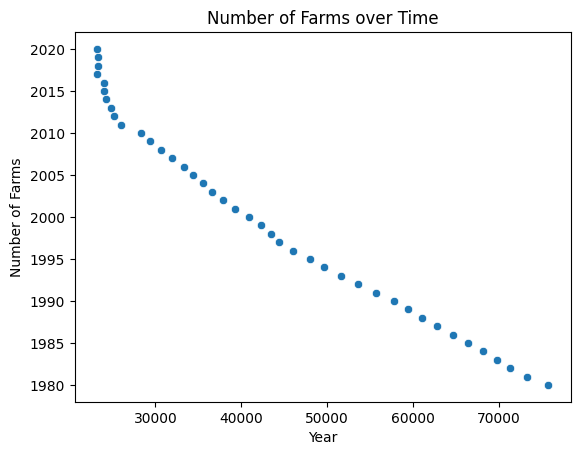

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=farms, x='number_of_farms', y='year')
plt.title('Number of Farms over Time')
plt.xlabel('Year')
plt.ylabel('Number of Farms')
plt.show()


4. Is there a positive / negative relationship between year and number_of_farms?

    $R = -0.9861066349492859$

In [5]:
# Correlatiecoëfficiënt berekenen
cor = np.corrcoef(farms['year'], farms['number_of_farms'])[0][1]
print(f"R = {cor:.4f}")

R = -0.9861


###  Examenstrategie:

####  Vraag:
**4. Is there a positive / negative relationship between year and number_of_farms?**

---

###  Wat moet je doen:

####  1. Gebruik `np.corrcoef()` om de correlatiecoëfficiënt \( R \) te berekenen

```python
cor = np.corrcoef(farms['year'], farms['number_of_farms'])[0][1]
print(f"R = {cor:.4f}")


6. Is there a strong relationship between year and 'number_of_farms'?

    $R^2 = 0.9724062954910041$

In [ ]:
# 1. X en y voorbereiden
X = farms['year'].values.reshape(-1, 1)  # onafhankelijke variabele
y = farms['number_of_farms'].values     # afhankelijke variabele

# 2. Model trainen
model = LinearRegression().fit(X, y)

# 3. Determinatiecoëfficiënt berekenen
r_squared = model.score(X, y) # Gebruik .score(X, y) om R² te berekenen
print(f"R² = {r_squared:.4f}")

R² = 0.9724


7. Draw a scatter plot of the 'average_area_per_farm_(ha)' versus the year.

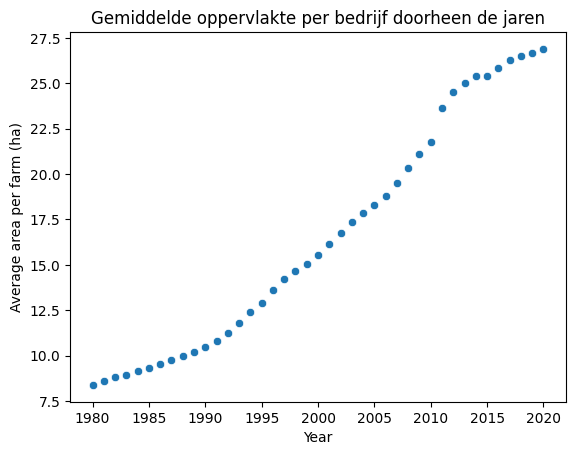

In [6]:
sns.scatterplot(data=farms, x='year', y='average_area_per_farm_(ha)')
plt.title('Gemiddelde oppervlakte per bedrijf doorheen de jaren')
plt.xlabel('Year')
plt.ylabel('Average area per farm (ha)')
plt.show()

8. What will be the 'average_area_per_farm_(ha)' in 2035?

Average area in 2035 = 34.91987804878045

In [7]:
# Regressiemodel trainen voor gemiddelde oppervlakte
X = farms['year'].values.reshape(-1, 1)
y = farms['average_area_per_farm_(ha)'].values
model = LinearRegression().fit(X, y)

# Voorspelling maken voor 2035
prediction = model.predict(np.array([[2035]]))
print(f"Voorspelde gemiddelde oppervlakte in 2035: {prediction[0]:.2f} ha")

Voorspelde gemiddelde oppervlakte in 2035: 34.92 ha


8. Calculate the total agricultural area for each year.   
Calculate for each year the change of the total area relative to 1980.  
Make a plot.

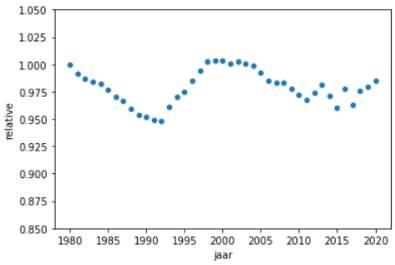


###  1. Totale oppervlakte berekenen per jaar:

In [5]:
# Totale oppervlakte = aantal bedrijven × gemiddelde oppervlakte per bedrijf
farms['total_area'] = farms['number_of_farms'] * farms['average_area_per_farm_(ha)']


### 2. Verandering t.o.v. 1980 berekenen (in %):

In [11]:
# Referentiejaar: 1980
base_area = farms.loc[farms['year'] == 1980, 'total_area'].values[0]

# % verandering per jaar
farms['change_vs_1980 (%)'] = ((farms['total_area'] - base_area) / base_area) * 100



634416.28


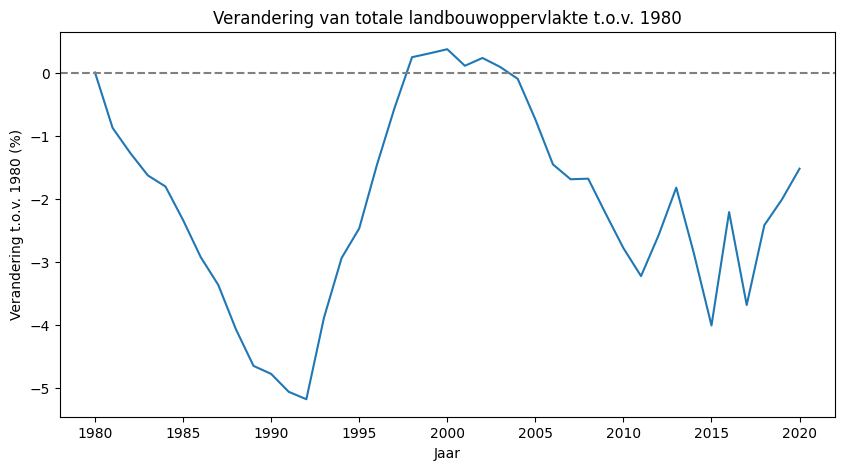

In [10]:
plt.figure(figsize=(10,5))
sns.lineplot(data=farms, x='year', y='change_vs_1980 (%)')
plt.axhline(0, color='gray', linestyle='dashed')  # nul-lijn
plt.title('Verandering van totale landbouwoppervlakte t.o.v. 1980')
plt.xlabel('Jaar')
plt.ylabel('Verandering t.o.v. 1980 (%)')
plt.show()